In [2]:
import pandas as pd
import sklearn
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
sns.set_theme()

In [4]:
# Generate mean accuracy and mean AUC table

mean_auc_table = {}
mean_auc_table_path = Path().resolve().joinpath('results/mean_auc_table.csv')

for file in Path().resolve().joinpath("./results/").iterdir():
    if str(file).endswith('_eval.csv'):
        eval_perf_table = pd.read_csv(file)

        classifier = eval_perf_table['classifier'][0]
        mean_acc = sum(eval_perf_table['accuracy']) / len(eval_perf_table['accuracy'])
        mean_auc = sum(eval_perf_table['auc']) / len(eval_perf_table['auc'])
        mean_miss = sum(eval_perf_table['miss_rate']) / len(eval_perf_table['miss_rate'])

        mean_auc_table[classifier] = {'Mean Accuracy': mean_acc, 'Mean AUC' : mean_auc, 'Mean Miss Rate': mean_miss}

mean_auc_table = pd.DataFrame.from_dict(mean_auc_table, orient='index')
mean_auc_table.to_csv(mean_auc_table_path)

print(mean_auc_table.to_markdown())

mean_auc_table

|                |   Mean Accuracy |   Mean AUC |   Mean Miss Rate |
|:---------------|----------------:|-----------:|-----------------:|
| XGBoost        |        0.982857 |   0.899631 |       0.0174433  |
| RandomForest   |        0.989831 |   0.937669 |       0.0101347  |
| DecisionTree   |        0.978879 |   0.724109 |       0.00952759 |
| TabTransformer |        0.983103 |   0.772889 |       0.0170634  |
| MLP            |        0.983364 |   0.897986 |       0.0164655  |


,Mean Accuracy,Mean AUC,Mean Miss Rate
XGBoost,0.982857,0.899631,0.017443
RandomForest,0.989831,0.937669,0.010135
DecisionTree,0.978879,0.724109,0.009528
TabTransformer,0.983103,0.772889,0.017063
MLP,0.983364,0.897986,0.016466


In [5]:
# Generate mean accuracy and mean AUC table (resampled)

mean_auc_table = {}
mean_auc_table_path = Path().resolve().joinpath('results/mean_resampled_auc_table.csv')

for file in Path().resolve().joinpath("./results/").iterdir():
    if str(file).endswith('_eval_resampled.csv'):
        eval_perf_table = pd.read_csv(file)

        classifier = eval_perf_table['classifier'][0]
        mean_acc = sum(eval_perf_table['accuracy']) / len(eval_perf_table['accuracy'])
        mean_auc = sum(eval_perf_table['auc']) / len(eval_perf_table['auc'])
        mean_miss = sum(eval_perf_table['miss_rate']) / len(eval_perf_table['miss_rate'])

        mean_auc_table[classifier] = {'Mean Accuracy': mean_acc, 'Mean AUC' : mean_auc, 'Mean Miss Rate': mean_miss}

mean_auc_table = pd.DataFrame.from_dict(mean_auc_table, orient='index')
mean_auc_table.to_csv(mean_auc_table_path)

print(mean_auc_table.to_markdown())

mean_auc_table

|                |   Mean Accuracy |   Mean AUC |   Mean Miss Rate |
|:---------------|----------------:|-----------:|-----------------:|
| XGBoost        |        0.982765 |   0.879396 |        0.0175231 |
| RandomForest   |        0.983241 |   0.807357 |        0.0169513 |
| DecisionTree   |        0.964793 |   0.626568 |        0.012931  |
| TabTransformer |        0.98318  |   0.771692 |        0.0170621 |
| MLP            |        0.982596 |   0.831457 |        0.0172757 |


,Mean Accuracy,Mean AUC,Mean Miss Rate
XGBoost,0.982765,0.879396,0.017523
RandomForest,0.983241,0.807357,0.016951
DecisionTree,0.964793,0.626568,0.012931
TabTransformer,0.983180,0.771692,0.017062
MLP,0.982596,0.831457,0.017276


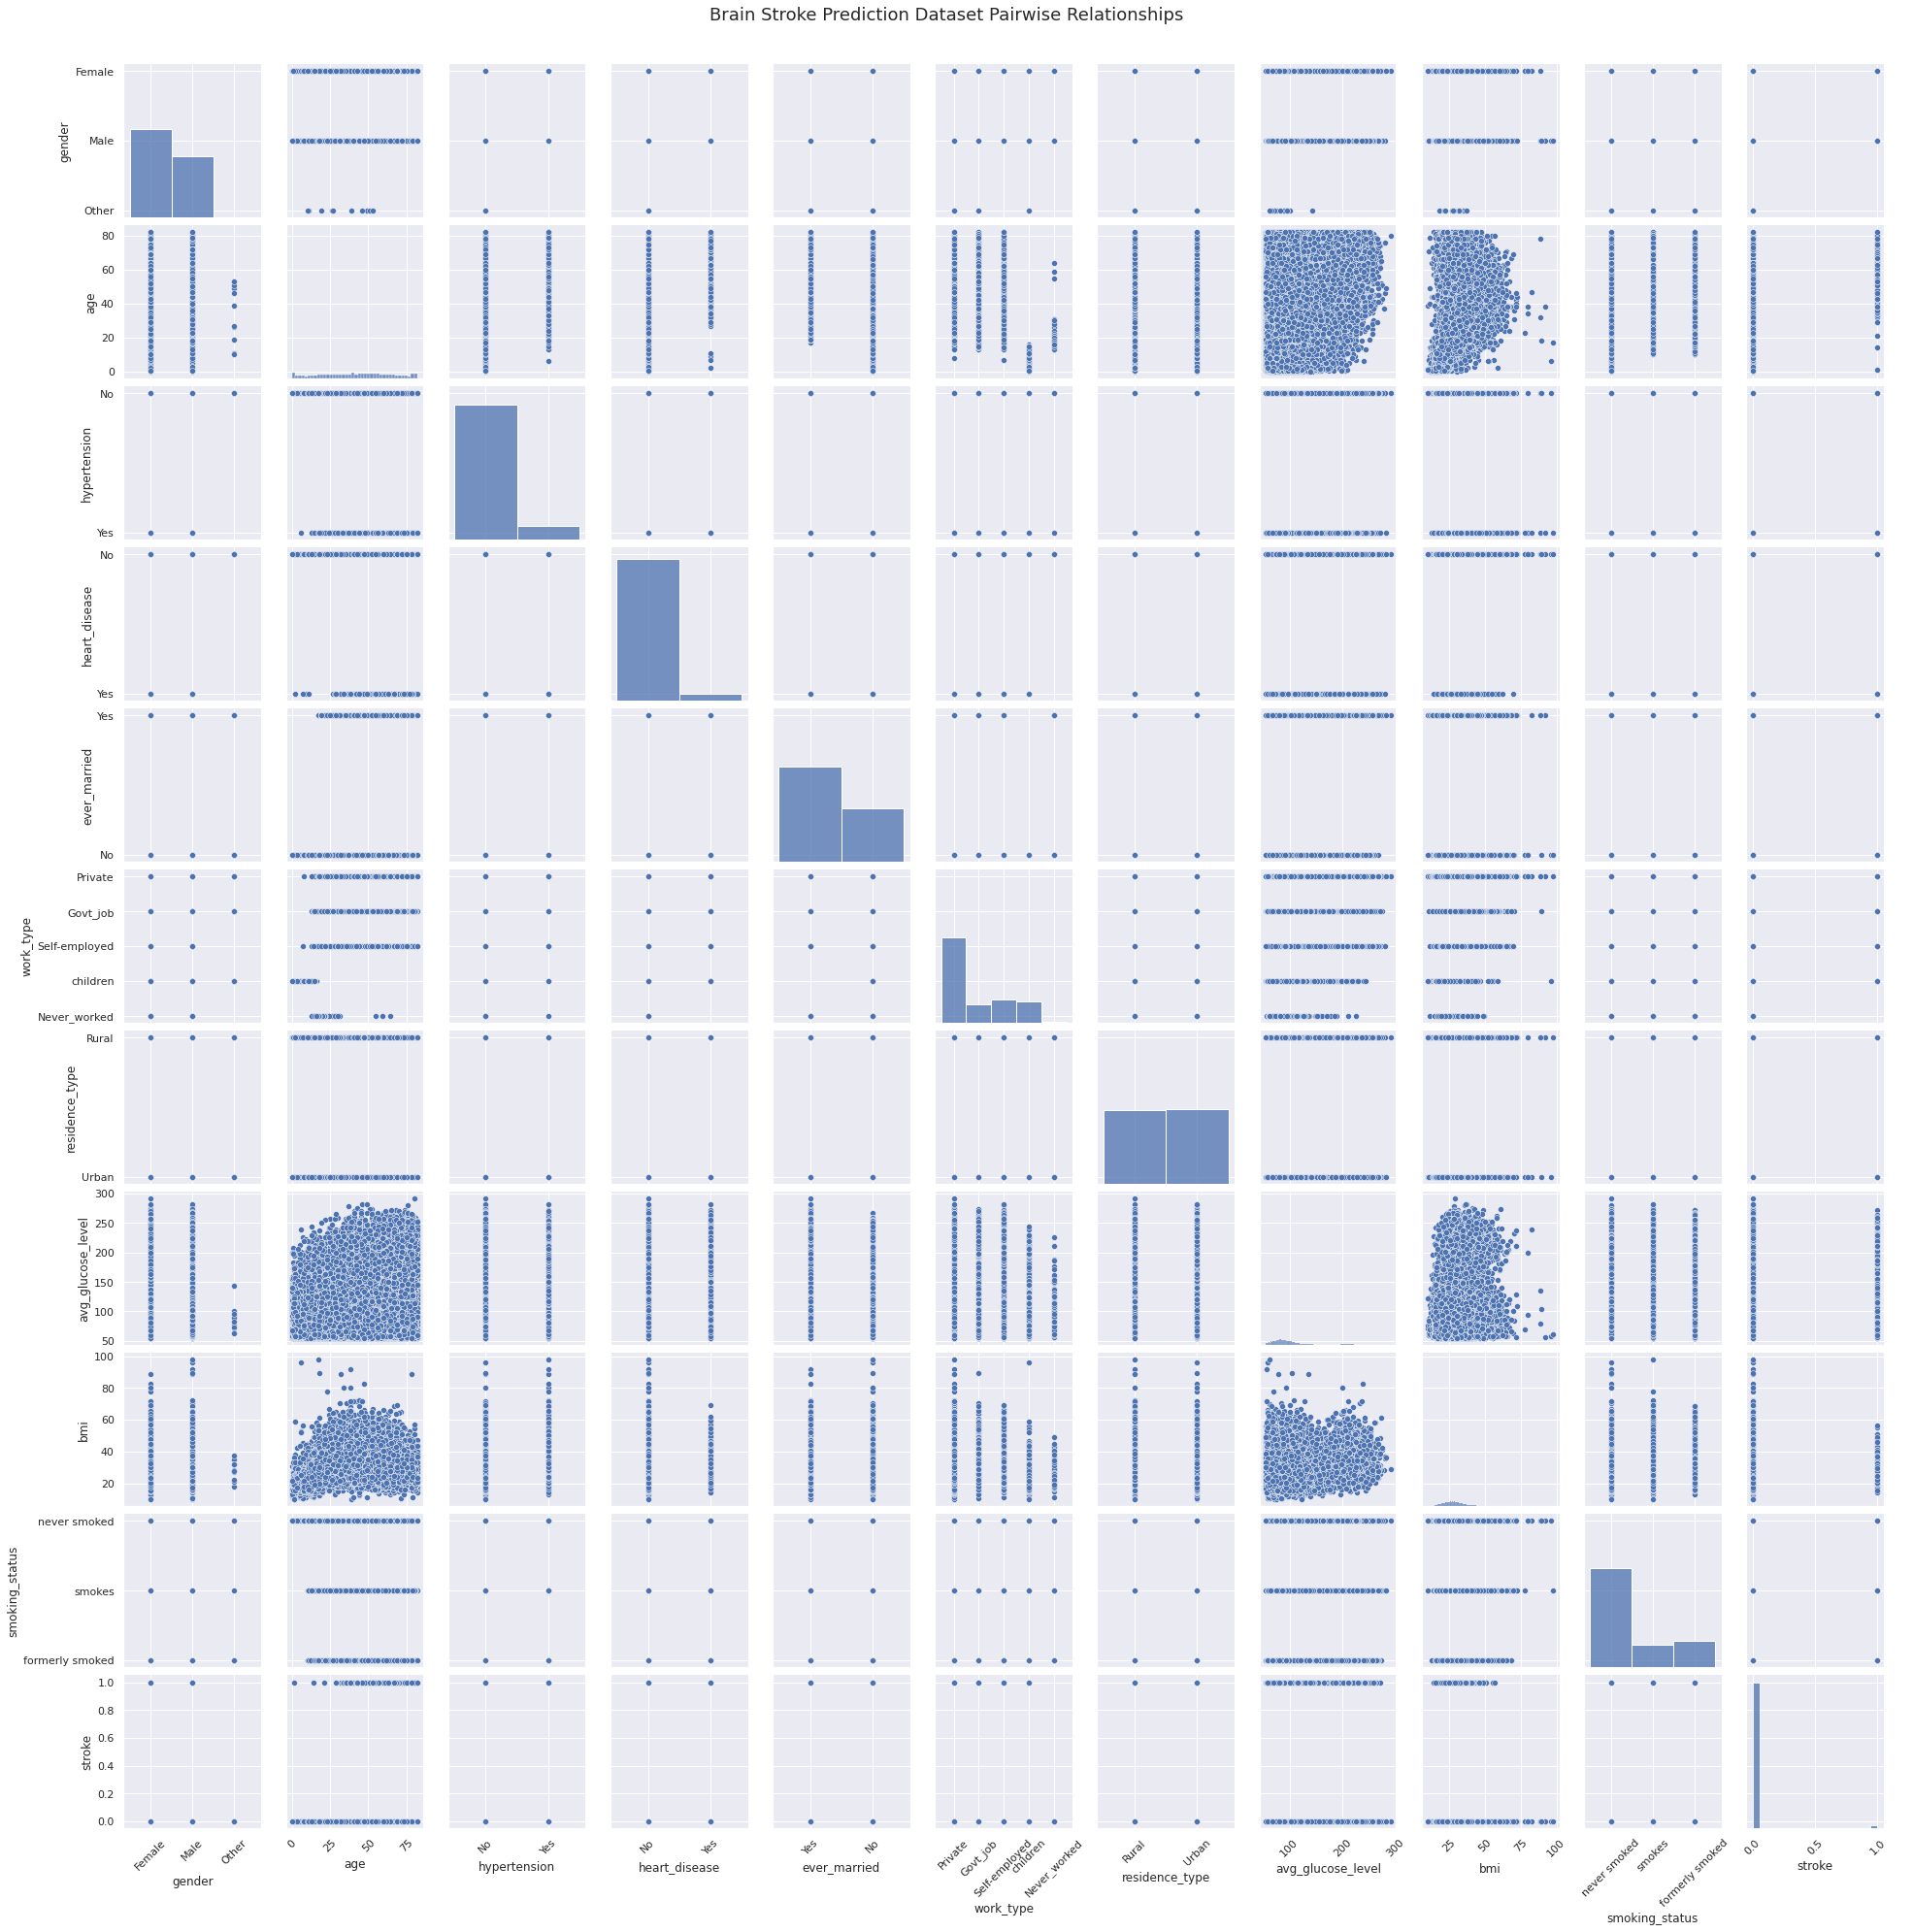

In [6]:
# pairplot
output = Path().resolve().joinpath('results/pairplot.png')
data_df = pd.read_csv(Path().resolve().joinpath('dataset/full_data_clean.csv'))

g = sns.pairplot(data_df, vars=list(data_df.columns))

g.add_legend()

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Brain Stroke Prediction Dataset Pairwise Relationships", fontsize=18)

for ax in g.axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

g.savefig(str(output))

/tmp/ipykernel_58008/2621293482.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


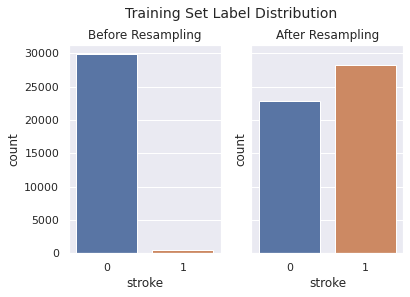

In [7]:
# plot train dataset class distribution before and after resampling

test_df_path = Path().resolve().joinpath('dataset/train_data_unsampled.csv')
test_df_resampled_path = Path().resolve().joinpath('dataset/train_data_resampled.csv')
output = Path().resolve().joinpath('results/training_set_label_distribution.png')

test_df = pd.read_csv(test_df_path).replace({1: "1", 0: "0"})
test_df_r = pd.read_csv(test_df_resampled_path).replace({1: "1", 0: "0"})

fig, ax =plt.subplots(1,2, sharey=True)

sns.countplot(test_df, x='stroke', ax=ax[0]).set(title="Before Resampling")
sns.countplot(test_df_r, x='stroke', ax=ax[1]).set(title="After Resampling")

ax[0].set_label('Before resampling')
ax[1].set_label('After resampling')

fig.subplots_adjust(top=0.85)
fig.suptitle('Training Set Label Distribution', fontsize=14)

fig.savefig(str(output))

fig.show()